In [4]:
%matplotlib inline 
from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal

from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft
import timeit

In [27]:
image =Image.open("/Users/yw18581/physics/10x10_25mm_8bit_clean/File_0.tiff")

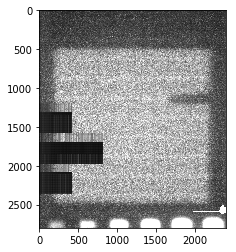

(<Figure size 432x288 with 1 Axes>,
 None)

In [29]:
pylab.figure(), pylab.imshow(image), pylab.show()

In [30]:
im = image.resize((image.width//5, image.height//5))

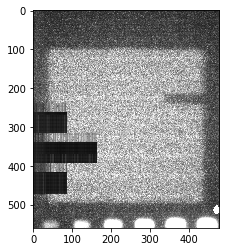

(<Figure size 432x288 with 1 Axes>,
 None)

In [31]:
pylab.figure(), pylab.imshow(im), pylab.show()

In [33]:
type(image)

PIL.TiffImagePlugin.TiffImageFile

In [34]:
image_mpl =imread("/Users/yw18581/physics/10x10_25mm_8bit_clean/File_0.tiff")

In [35]:
image_mpl.shape

(2800, 2400)

In [41]:
np.unique(image_mpl[np.where(image_mpl)])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

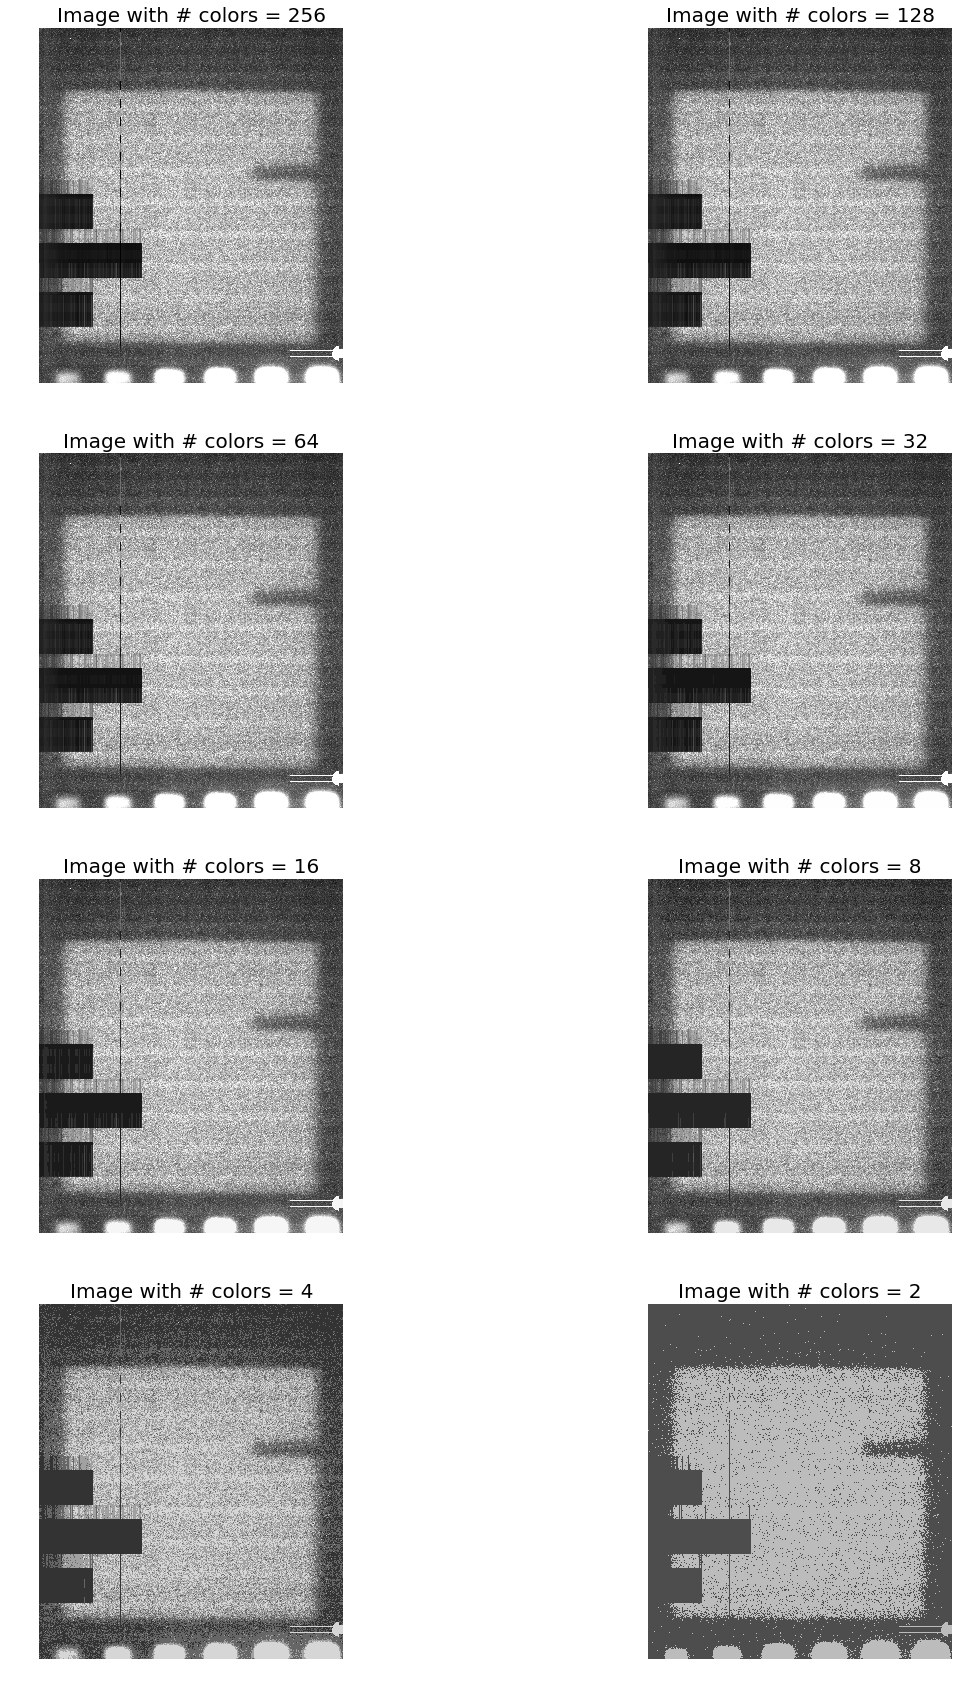

In [44]:
pylab.figure(figsize=(20,30))
num_colors_list = [1 << n for n in range(8,0,-1)]
i = 1
for num_colors in num_colors_list:
    im1 = image.convert('P', palette=Image.ADAPTIVE, colors=num_colors)
    pylab.subplot(4,2,i), pylab.imshow(im1), pylab.axis('off')
    pylab.title('Image with # colors = ' + str(num_colors), size=20)
    i += 1
#pylab.subplots_adjust(wspace=0.2, hspace=0)
pylab.show()

255
(2800, 2400)


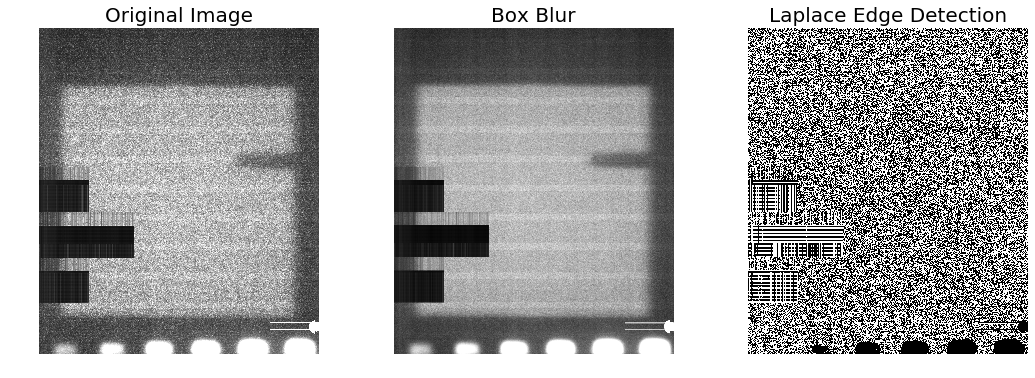

In [45]:
im = image_mpl
print(np.max(im))
# 1.0
print(im.shape)
# (225, 225)
blur_box_kernel = np.ones((3,3)) / 9
edge_laplace_kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])
im_blurred = signal.convolve2d(im, blur_box_kernel)
im_edges = np.clip(signal.convolve2d(im, edge_laplace_kernel), 0, 1)
fig, axes = pylab.subplots(ncols=3, sharex=True, sharey=True, figsize=(18, 6))
axes[0].imshow(im, cmap=pylab.cm.gray)
axes[0].set_title('Original Image', size=20)
axes[1].imshow(im_blurred, cmap=pylab.cm.gray)
axes[1].set_title('Box Blur', size=20)
axes[2].imshow(im_edges, cmap=pylab.cm.gray)
axes[2].set_title('Laplace Edge Detection', size=20)
for ax in axes:
 ax.axis('off')
pylab.show()